<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Bike-sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
df = pd.read_csv('/content/drive/MyDrive/Alma better Projects/Bike Rental /Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

# Understanding Data

In [125]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [126]:
df.shape

(8760, 14)

* No null values is present in the dataset

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [128]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [129]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Duplicate values**
* Why is it important to remove duplicate records from my data?

* "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [130]:
# Checking Duplicate Values
df.duplicated().sum()


0

* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.
* Some of the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.

**Data Preprocessing**

In [131]:
# Changing the "Date" column into three "year","month","day" column
import datetime as dt
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

**Observation**
* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so * if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.


**Renaming Features**

In [132]:
#Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [133]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [134]:
for i in df:
  print(i)
  print(df[i].unique())

Rented_Bike_Count
[ 254  204  173 ... 1538  804  595]
Hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Temperature
[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5.    4.6   4.1   3.5   4.    3.9   3.3   3.4   3.1
   3.2   4.4   5.1   5.8   6.8   8.    6.7   5.7   5.2   4.7   4.2   3.6
   2.8   2.    0.2  -1.5  -1.1   0.1  -0.1  -0.2  -2.1  -3.6  -4.6  -5.3
  -5.8  -6.1  -6.8  -6.9  -7.2  -7.5  -8.1  -3.9  -2.3  -1.6  -0.7  -2.6
  -3.2  -3.7  -2.8  -2.5  -3.   -3.4  -3.3   1.6   5.3   1.1   1.3   1.4
   1.5   1.    0.3   2.3   3.7   0.7  -1.4  -2.7  -4.8  -7.   -6.7  -2.
  -1.7  -2.4  -3.1  -4.1  -4.7  -5.1  -5.4   2.5   0.4   0.5   0.9   5.4
  -1.   -5.6  -5.9  -7.1  -7.9  -8.6  -9.3  -9.7 -10.2 -10.7 -11.  -11.2
 -11.5 -11.6 -11.8 -12.1 -12.3 -10.5  -9.4  -8.3  -7.

In [135]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

## EDA 


**Changing data type**
* As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [136]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

**Month**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

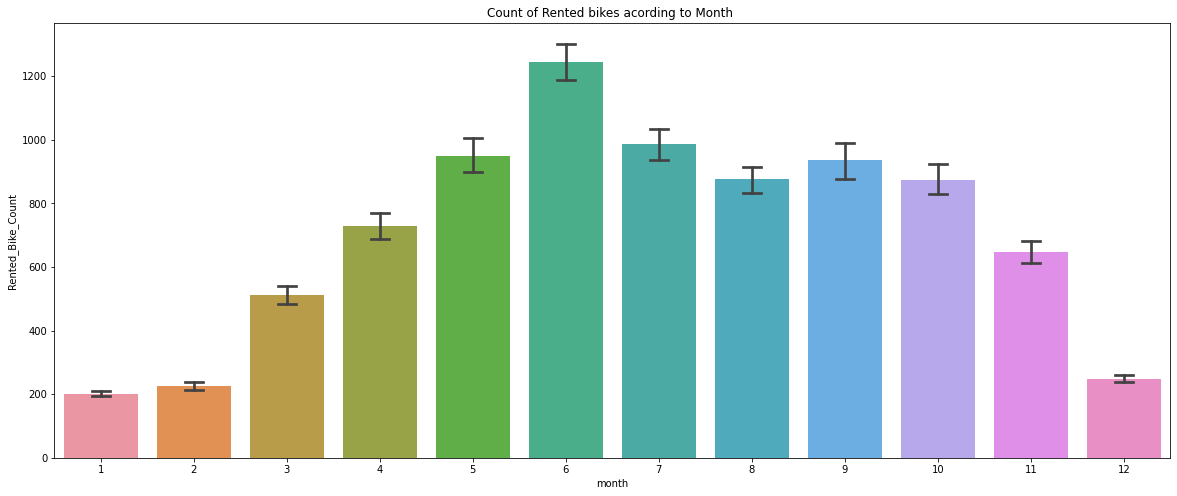

In [137]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

**Observation**
* From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

**weekdays_weekend**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

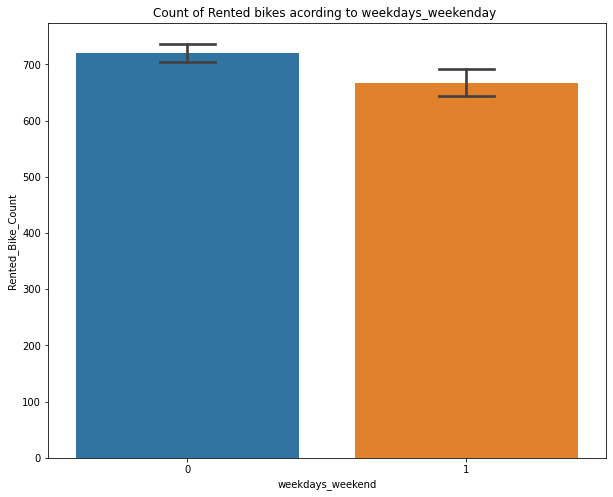

In [138]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

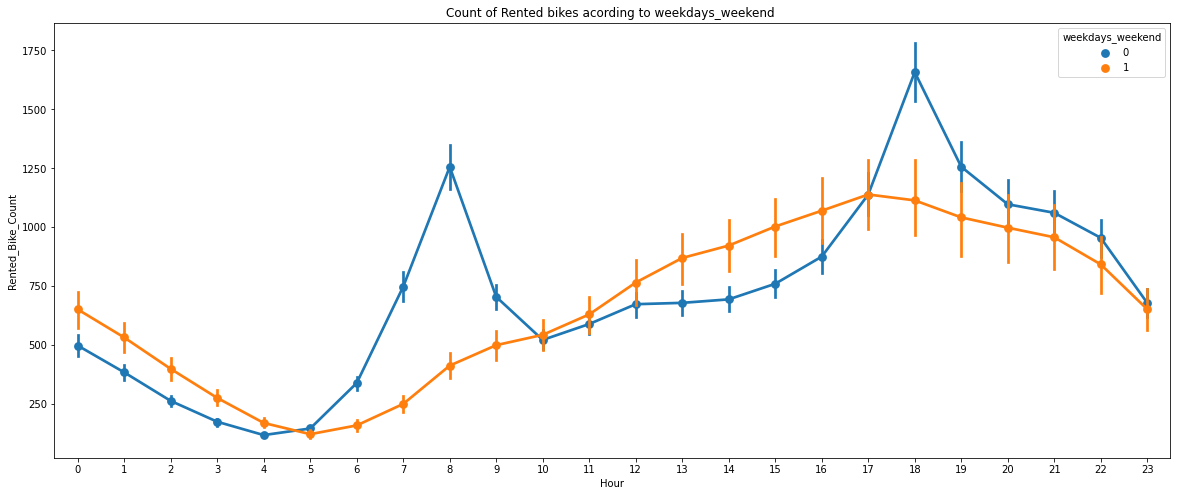

In [139]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

**Observation**
* From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

**Hour**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

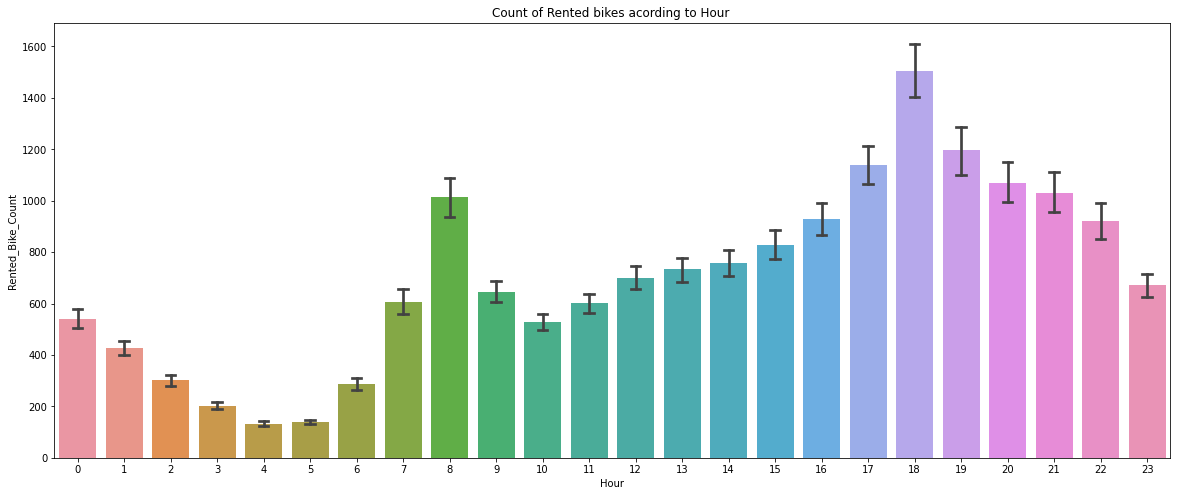

In [140]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observation**
* In the above plot which shows the use of rented bike according the hours and the data are from all over the year.

* generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

**Seasons**

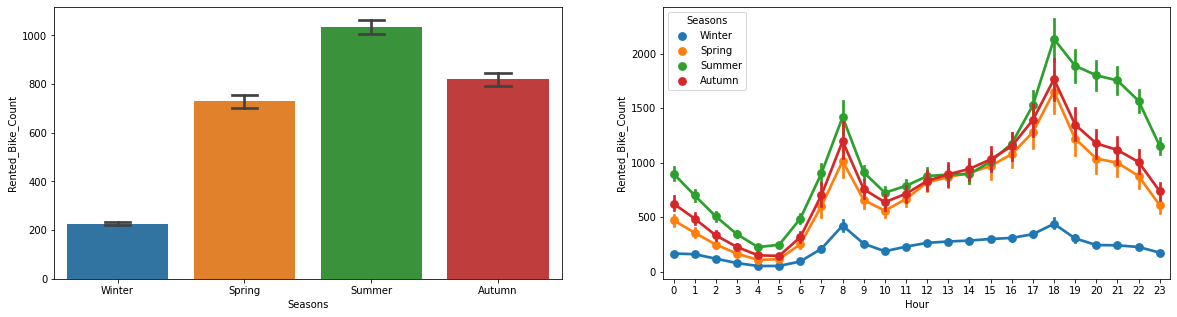

In [141]:

fig, ax = plt.subplots(1,2,figsize = (20,5))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax[0],capsize=.2)
# ax.set(title='Count of Rented bikes acording to Seasons ')
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax[1])
# ax.set(title='Count of Rented bikes acording to seasons ')
plt.show()

**Observation**
* In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,
* In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.
* In winter season the use of rented bike is very low because of snowfall

**Analyze of Numerical variables**
* What is Numerical Data

  * Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.
Analyze of Numerical variables distplots

In [142]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

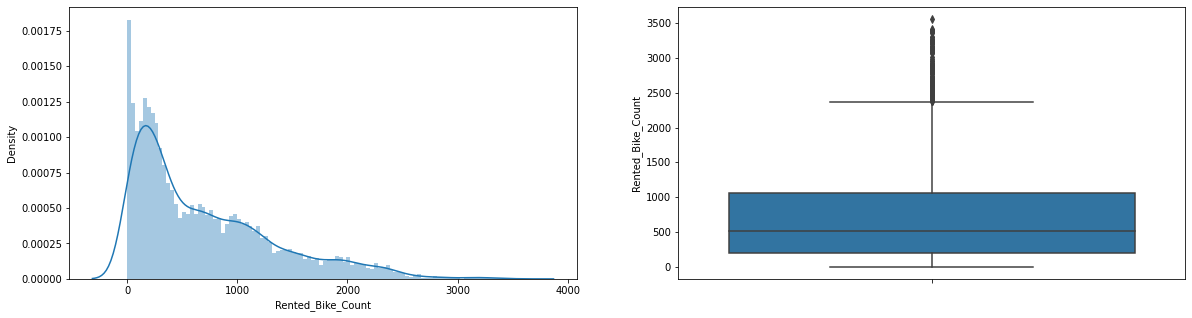

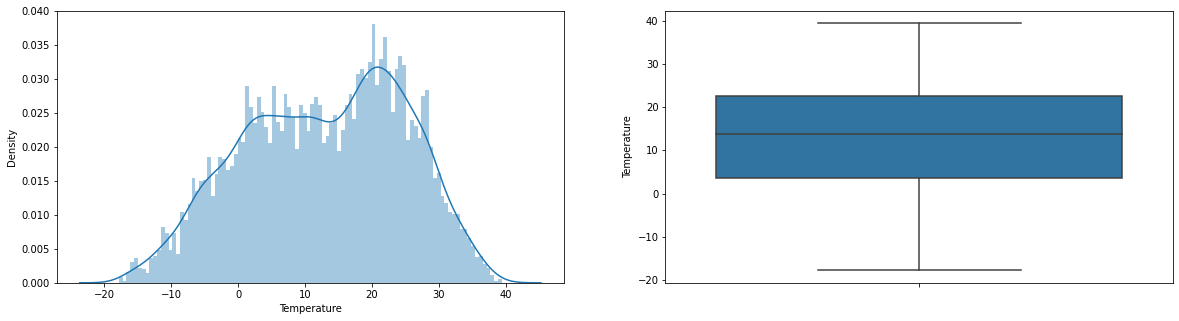

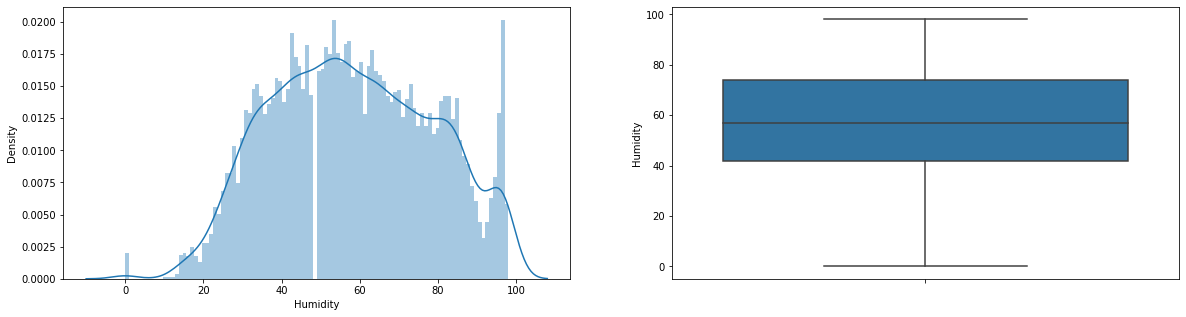

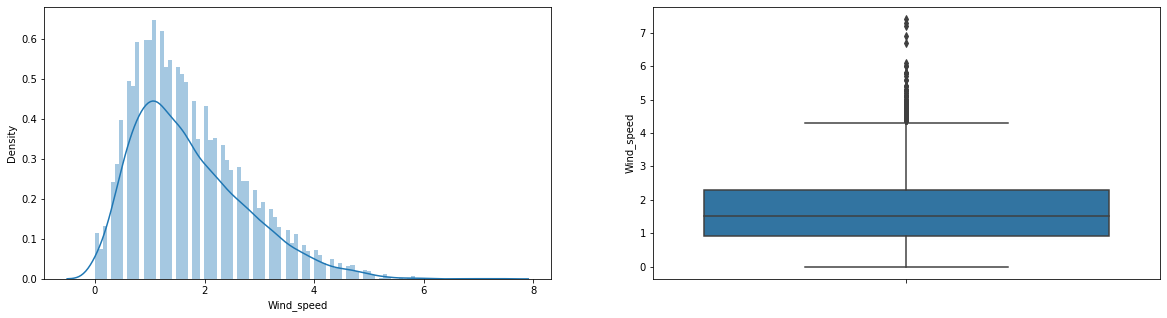

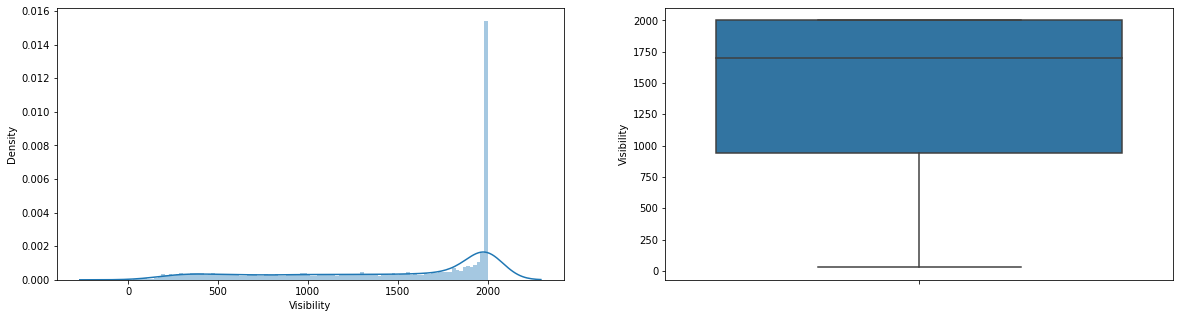

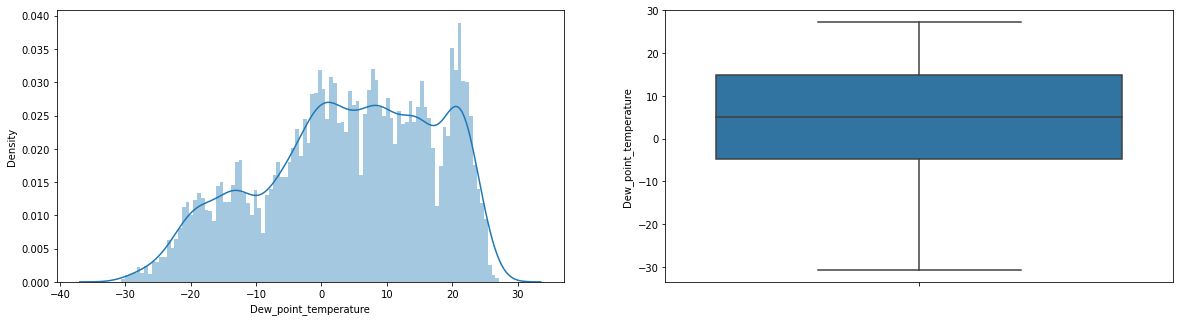

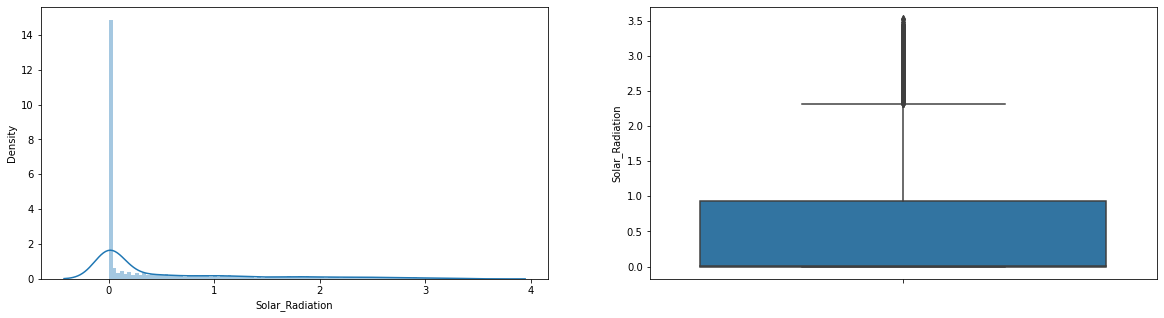

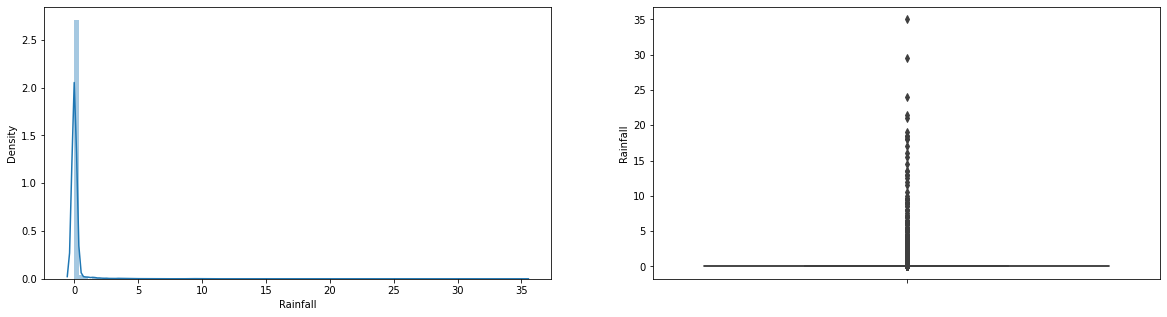

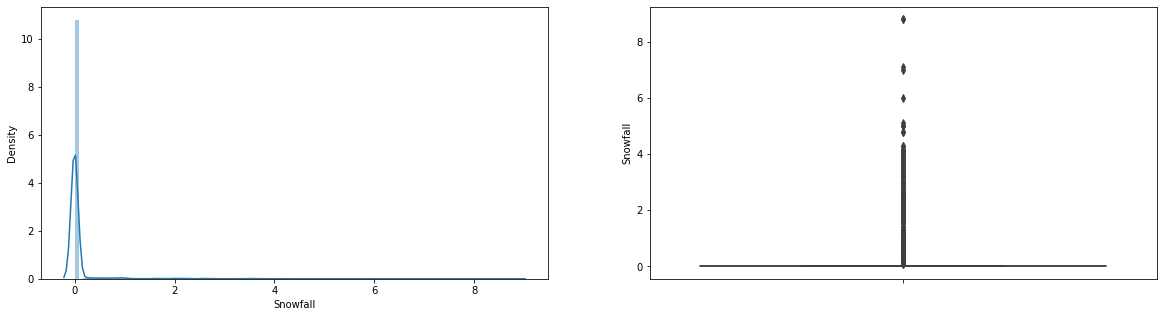

In [143]:
for col in numerical_features:
  fig, ax = plt.subplots(1,2,figsize = (20,5))
  sns.distplot(df[col],bins = 100, ax = ax[0])
  sns.boxplot(y = df[col], ax = ax[1])
  plt.show()

**Observation**
* More demand during the Summer
* Least demand during the Winter.

In [144]:
df.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


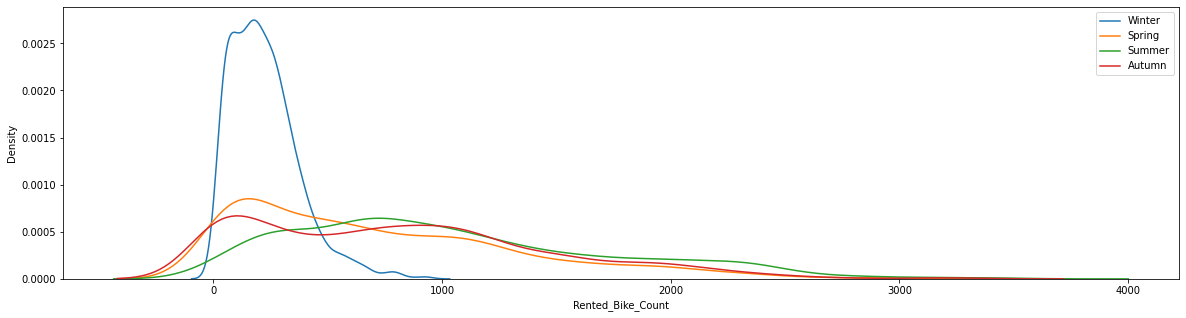

In [145]:
fig, ax = plt.subplots(figsize = (20,5))
sns.kdeplot(x=df[df['Seasons']=='Winter']['Rented_Bike_Count'],label='Winter')
sns.kdeplot(x=df[df['Seasons']=='Spring']['Rented_Bike_Count'],label='Spring')
sns.kdeplot(x=df[df['Seasons']=='Summer']['Rented_Bike_Count'],label='Summer')
sns.kdeplot(x=df[df['Seasons']=='Autumn']['Rented_Bike_Count'],label='Autumn')
plt.legend()
plt.show()

* Count of Rented Bike during the winter is very less as compared to other season.

**Regression plot**
* The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

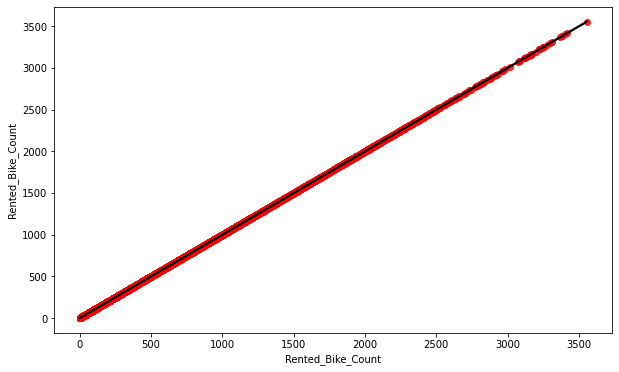

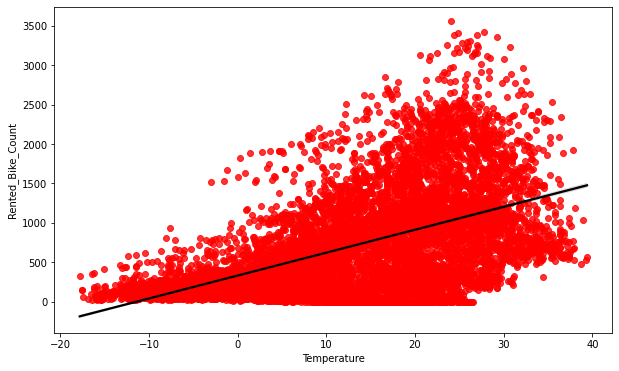

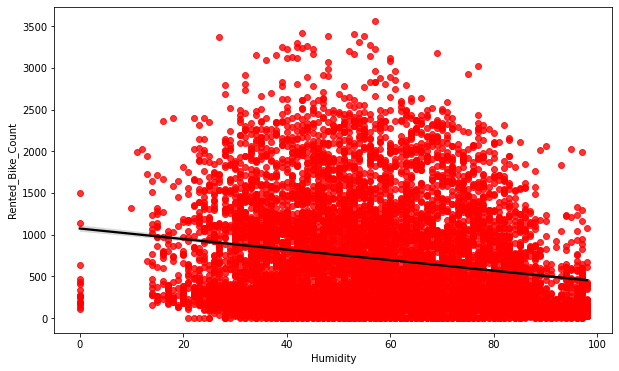

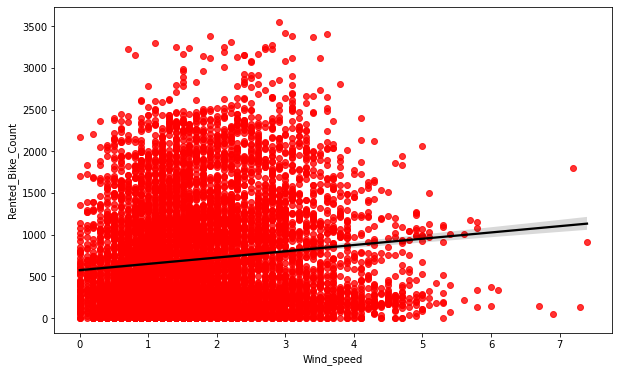

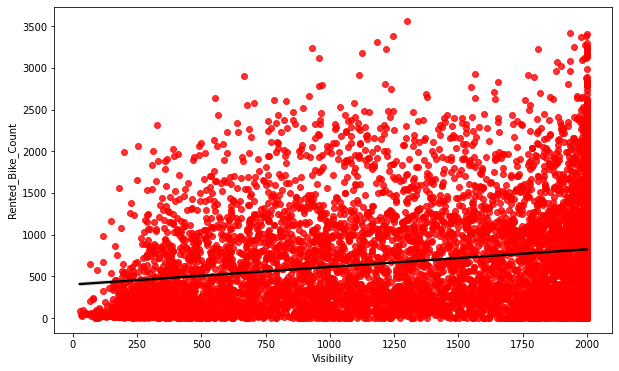

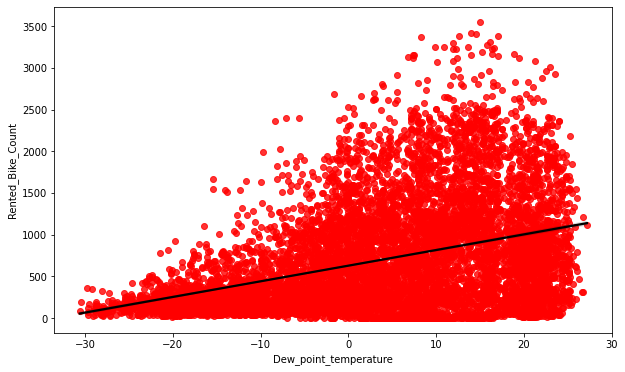

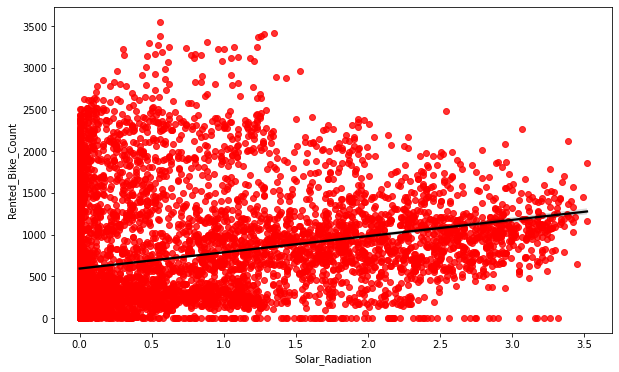

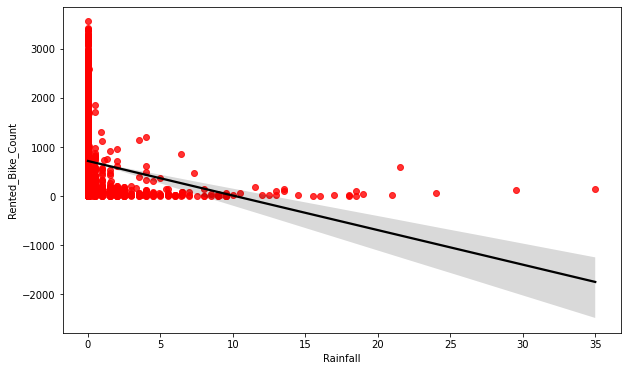

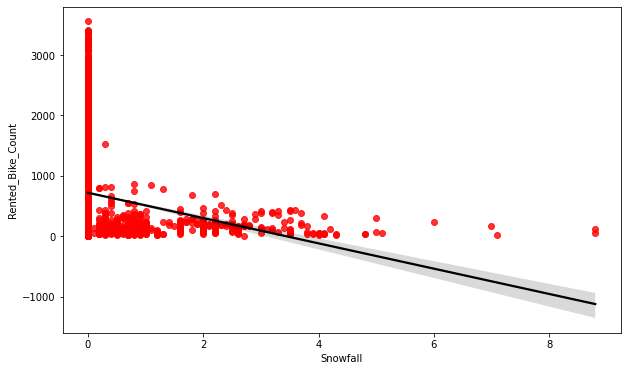

In [146]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'Red'}, line_kws={"color": "black"})


**Observation**
* From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.
* which means the rented bike count increases with increase of these features.
'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

**Normalise Rented_Bike_Count column data**
* The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data

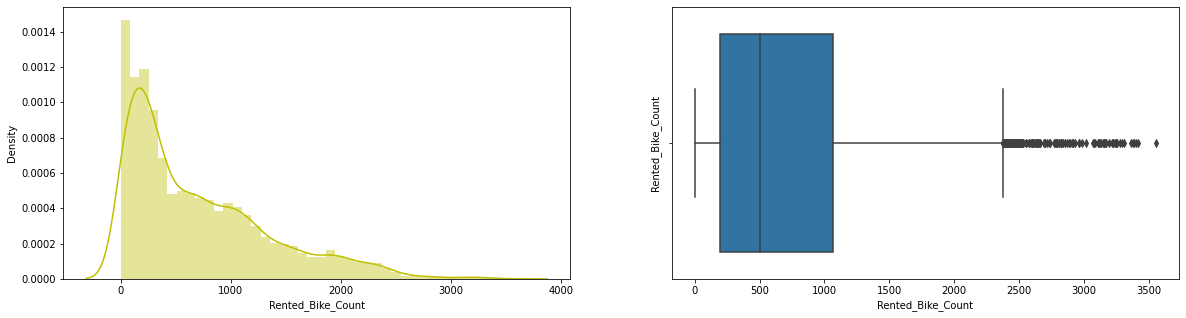

In [147]:
#Distribution plot of Rented Bike Count
fig, ax = plt.subplots(1,2,figsize = (20,5))
# plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y",ax=ax[0])

#Boxplot of Rented Bike Count to check outliers
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'], ax = ax[1])
plt.show()


**Appling square root transformation to normalised the skewness.**

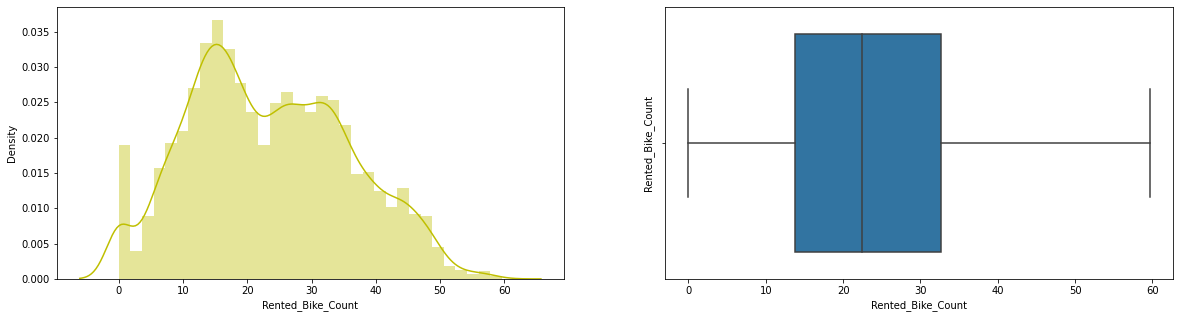

In [148]:
#Distribution plot of Rented Bike Count
fig, ax = plt.subplots(1,2,figsize = (20,5))
# plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
sns.distplot(np.sqrt(df['Rented_Bike_Count']),hist=True ,color="y",ax=ax[0])

#Boxplot of Rented Bike Count to check outliers
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']), ax = ax[1])
plt.show()

**Correlation between target variable and continuous features**

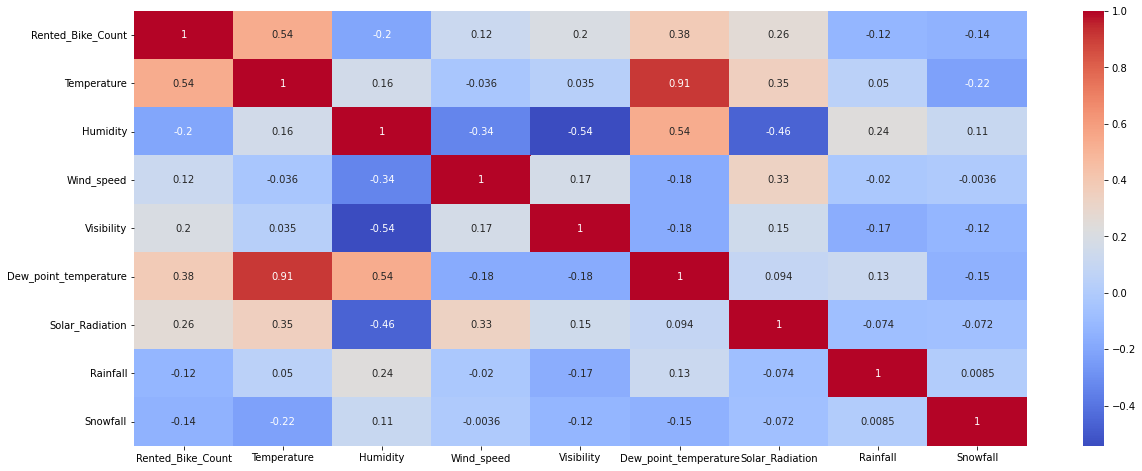

In [149]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation), annot=True,cmap='coolwarm')
plt.show()

**We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :**

* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are:**
* Humidity
* Rainfall

**From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.**


#Lets check the VIF.

In [150]:
# vif for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = df[numerical_features].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[numerical_features].values, i)
                          for i in range(len(df[numerical_features].columns))]
  
print(vif_data)

                 feature        VIF
0      Rented_Bike_Count   3.617343
1            Temperature  34.564747
2               Humidity   5.092372
3             Wind_speed   4.566498
4             Visibility   9.055760
5  Dew_point_temperature  16.039388
6        Solar_Radiation   2.886574
7               Rainfall   1.096052
8               Snowfall   1.119773


In [151]:
#drop the Dew point temperature column
df=df.drop(['Dew_point_temperature'],axis=1)

In [152]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [153]:
df_final = df.copy()

In [155]:
Mean_encoded_Hour = df_final.groupby(['Hour'])['Rented_Bike_Count'].mean().to_dict()
  
df_final['Hour'] =  df_final['Hour'].map(Mean_encoded_Hour)

In [156]:
df_final.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [158]:
df_new = pd.get_dummies(df_final, columns=['Seasons','Holiday','Functioning_Day'])

#Scaling & Feature Selection

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_new[[i for i in df_new.columns if i != 'Rented_Bike_Count']]
Y = df_new['Rented_Bike_Count']

**Sequential Forward Selection and Backward elimination approach for Feature Selection**

In [161]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [166]:
linReg = LinearRegression()
sfs = SFS(estimator=linReg,       # Use logistic regression as our classifier
          k_features=(6, 13),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='neg_mean_squared_error', # The metric to use to evaluate the classifier is accuracy 
          verbose = True,
          cv=5)     

In [167]:
sfs = sfs.fit(X, Y)
print("\n","*"*50)
print('Best accuracy score: %.2f' % sfs.k_score_)   
print('Best subset (indices):', sfs.k_feature_idx_)                                                     
print('Best subset (corresponding names):', sfs.k_feature_names_) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s finished
Features: 6/13[Parallel(


 **************************************************
Best accuracy score: -200383.31
Best subset (indices): (0, 1, 2, 3, 6, 9, 13, 16)
Best subset (corresponding names): ('Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Rainfall', 'weekdays_weekend', 'Seasons_Winter', 'Functioning_Day_No')


In [169]:
X = df_new[['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Rainfall', 'weekdays_weekend', 'Seasons_Winter', 'Functioning_Day_No']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [170]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Linear Regression**

In [172]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)

print(r2_score(Y_test,y_pred))
ytrainpred = reg.predict(X_train)
print(r2_score(Y_train,ytrainpred))

0.6338395127853449
0.6322235521213755
